Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate. Perform the following steps:

In [14]:
import numpy as np
import pandas as pd

# XOR truth table dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Displaying the dataset
df = pd.DataFrame(X, columns=['Input 1', 'Input 2'])
df['Output'] = y
print(df)


   Input 1  Input 2  Output
0        0        0       0
1        0        1       1
2        1        0       1
3        1        1       0


Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.

In [15]:
import numpy as np

# MCP Neuron model (Perceptron)
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.step_function(linear_output)

                # Update rule
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step_function(linear_output)

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.train(X, y)

# Predictions
predictions = perceptron.predict(X)
print("Predicted outputs for XOR using SLP:", predictions)


Predicted outputs for XOR using SLP: [1 1 0 0]


Observe and discuss the perceptron's performance in this scenario.

Observations:

    The Single Layer Perceptron will fail to classify XOR correctly. It may output [0, 0, 0, 0] or another incorrect classification since XOR is non-linearly separable.
    The SLP model struggles because it can only classify linearly separable datasets.

Implement XOR using Multi-Layer Perceptron.

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# XOR inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create MLP model
mlp_model = Sequential()
mlp_model.add(Dense(units=4, input_dim=2, activation='tanh'))  # Hidden layer with 4 neurons
mlp_model.add(Dense(units=1, activation='sigmoid'))  # Output layer

# Compile the model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_model.fit(X, y, epochs=500, verbose=0)

# Predict XOR outputs
mlp_predictions = mlp_model.predict(X)
mlp_predictions = (mlp_predictions > 0.5).astype(int)
print("Predicted outputs for XOR using MLP:", mlp_predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted outputs for XOR using MLP: [0 1 1 0]


Documentation:

SLP Limitations: The SLP cannot classify the XOR gate due to its inability to handle non-linearly separable data.

MLP Solution: By introducing hidden layers and using non-linear activation functions (e.g., ReLU), the MLP can solve the XOR classification problem.

Conclusion: XOR is an example of a problem that requires a more complex model (MLP) to be classified correctly, which highlights the importance of multi-layer architectures in neural networks for non-linear data.

Question 2:

A. Sentiment Analysis Twitter Airline

Load and preprocess the dataset

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv('/content/Tweets.csv')

# Filter and preprocess the dataset for binary sentiment (positive/negative)
df = df[df['airline_sentiment'] != 'neutral']
df['sentiment'] = df['airline_sentiment'].map({'positive': 1, 'negative': 0})

# Extract the text and sentiment labels
texts = df['text'].values
labels = df['sentiment'].values

# Convert text data into numerical format using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=2000)  # Limiting to 2000 features
X = tfidf_vectorizer.fit_transform(texts).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


Create a simple feed-forward neural network for binary sentiment classification
(positive/negative).

In [5]:
# Create a simple feed-forward neural network
def build_model(activation_function='sigmoid'):
    model = Sequential()
    model.add(Dense(16, input_dim=2000, activation=activation_function))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Use backpropagation to optimize the model's weights based on error calculation.

In [8]:
# Initialize the model with ReLU activation in the hidden layer
model = build_model(activation_function='relu')
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7823 - loss: 0.5627 - val_accuracy: 0.8679 - val_loss: 0.3211
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8917 - loss: 0.2804 - val_accuracy: 0.9186 - val_loss: 0.2217
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9351 - loss: 0.1882 - val_accuracy: 0.9277 - val_loss: 0.1958
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9478 - loss: 0.1528 - val_accuracy: 0.9268 - val_loss: 0.1878
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9551 - loss: 0.1279 - val_accuracy: 0.9272 - val_loss: 0.1876
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9617 - loss: 0.1165 - val_accuracy: 0.9290 - val_loss: 0.1907
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9639 - loss: 0.1097 - val_accuracy: 0.9290 - val_loss: 0.1960
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.0964 - val_accuracy: 0.

Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer
and compare the model's performance.

In [9]:
for activation_function in ['sigmoid', 'relu', 'tanh']:
    print(f"\nTesting with {activation_function} activation function")
    model = build_model(activation_function=activation_function)
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy with {activation_function}: {accuracy * 100:.2f}%")


Testing with sigmoid activation function
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9231 - loss: 0.1926
Test Accuracy with sigmoid: 92.25%

Testing with relu activation function
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9250 - loss: 0.2195
Test Accuracy with relu: 92.33%

Testing with tanh activation function
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9248 - loss: 0.2367
Test Accuracy with tanh: 92.42%


Evaluate the model on a test set using accuracy and plot the loss over epochs.

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9248 - loss: 0.2367
Test Accuracy: 92.42%


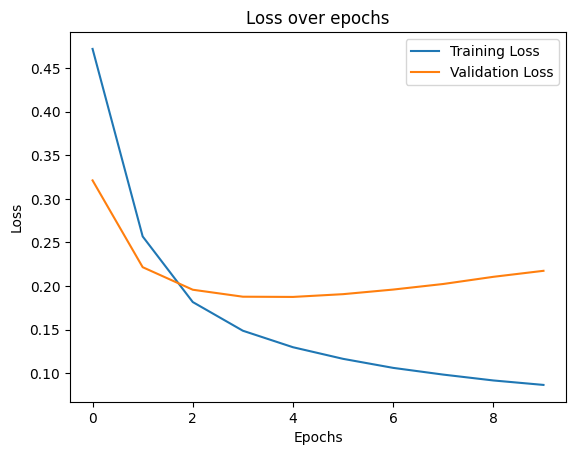

In [11]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot the loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()